<a href="https://www.kaggle.com/code/josmiguelvilches/digit-recognition?scriptVersionId=195153507" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [100]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [101]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import matplotlib.pyplot as plt

seed = 42

# Load Data

In [102]:
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
X_test = df_test

# Create validation df

In [103]:
#Create training and validation df
X_train = df_train.sample(frac = 0.7, random_state = seed)
X_valid = df_train.drop(X_train.index)

# Normalization

In [104]:
#Normalization 0-1
#X_train = X_train / 255.0
#X_valid = X_valid / 255.0
#X_test = X_test / 255.0

# Split features and target

In [105]:
#Split features and target
Y_train = X_train['label']
Y_valid = X_valid['label']

X_train = X_train.drop('label', axis = 1)
X_valid = X_valid.drop('label', axis = 1)

# Reshape

In [106]:
print(X_train.shape)  # This should give you (number of samples, 784)
print(X_test.shape)   # This should give you (number of samples, 784)

(29400, 784)
(28000, 784)


In [107]:
##X_train = X_train.values.reshape(-1, 28, 28, 1)
##X_test = X_test.values.reshape(-1, 28, 28, 1)

# Define network structure

In [108]:
## Define the Neuronal network 
model = keras.Sequential([
    layers.Dense(units = 25,  activation= 'relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(25, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(25, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10, activation= 'linear'),## It could be softmax, but for more precision we are using linear and importing the library SparseCategoricalCrossentropy
])

# Compile and fit model

In [109]:

#Import SparseCategoricalCrossentropy to take care of loss
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits = True),  # Use this loss function for integer labels
    metrics=['accuracy'],  # Use 'accuracy' for multi-class classification
)

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

#Fit model
history = model.fit(x = X_train,
                    y = Y_train,
                    validation_data = (X_valid, Y_valid),
                    batch_size = 256,
                    epochs = 200,
                    verbose = 0,
                    callbacks = [early_stopping],
)

# Graph performance 

Best Validation Loss: 0.2326
Best Validation Accuracy: 0.9394


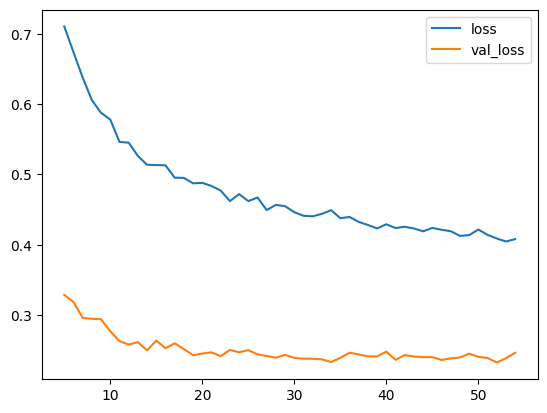

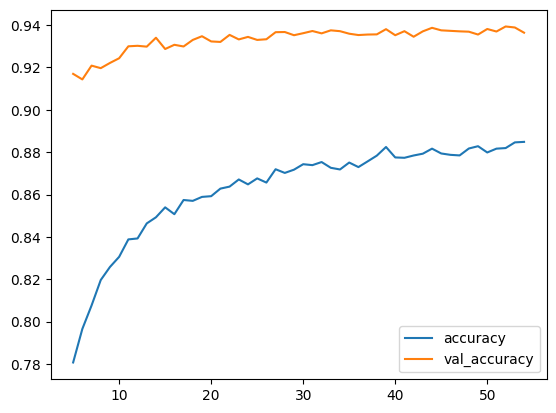

In [110]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [111]:
# Predict the values from the test dataset
Y_pred = model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


# Predict

In [112]:
#Transform prediction to dataframe and check probabilities
results = pd.DataFrame(Y_pred)
results

,0,1,2,3,4,5,6,7,8,9
0,1.963024,1.402441,14.398011,6.462383,-5.651368,-4.972969,-1.986788,-4.422669,1.019822,-8.642097
1,10.768757,-5.411914,-0.526749,-0.845948,-5.555440,3.109889,0.604637,-1.111311,-1.390638,-4.638158
2,-2.027847,-1.832161,-0.164145,0.034175,2.839014,0.268472,-1.793676,1.781966,0.927443,4.783460
3,-2.126790,-2.759469,0.912517,-1.355993,4.729210,-0.160281,0.327118,-0.465870,0.130708,2.663494
4,1.343911,0.158604,2.967464,2.447838,-2.034872,-0.149312,0.451160,0.155798,0.705099,-1.033369
...,...,...,...,...,...,...,...,...,...,...
27995,-3.132432,-2.276016,-1.039116,-0.072684,3.347038,0.006708,-3.378176,2.659657,0.934992,6.502356
27996,-0.862393,0.409456,-3.575331,0.990846,-2.161835,-0.165838,-5.046767,9.841902,-1.978462,3.615195
27997,-2.197137,-1.910552,-0.483421,13.237525,-5.420879,5.302444,-6.040116,-3.776022,-0.875422,-0.980074
27998,-3.136100,-2.643968,-1.045342,-0.532238,3.580805,-0.191384,-3.312752,2.558290,0.669672,6.615832


In [113]:
results['label'] = -999

In [114]:
results['label'] = results.idxmax(axis = 1)
results

,0,1,2,3,4,5,6,7,8,9,label
0,1.963024,1.402441,14.398011,6.462383,-5.651368,-4.972969,-1.986788,-4.422669,1.019822,-8.642097,2
1,10.768757,-5.411914,-0.526749,-0.845948,-5.555440,3.109889,0.604637,-1.111311,-1.390638,-4.638158,0
2,-2.027847,-1.832161,-0.164145,0.034175,2.839014,0.268472,-1.793676,1.781966,0.927443,4.783460,9
3,-2.126790,-2.759469,0.912517,-1.355993,4.729210,-0.160281,0.327118,-0.465870,0.130708,2.663494,4
4,1.343911,0.158604,2.967464,2.447838,-2.034872,-0.149312,0.451160,0.155798,0.705099,-1.033369,2
...,...,...,...,...,...,...,...,...,...,...,...
27995,-3.132432,-2.276016,-1.039116,-0.072684,3.347038,0.006708,-3.378176,2.659657,0.934992,6.502356,9
27996,-0.862393,0.409456,-3.575331,0.990846,-2.161835,-0.165838,-5.046767,9.841902,-1.978462,3.615195,7
27997,-2.197137,-1.910552,-0.483421,13.237525,-5.420879,5.302444,-6.040116,-3.776022,-0.875422,-0.980074,3
27998,-3.136100,-2.643968,-1.045342,-0.532238,3.580805,-0.191384,-3.312752,2.558290,0.669672,6.615832,9


In [117]:
results['row_index'] = results.index +1
results

,0,1,2,3,4,5,6,7,8,9,label,row_index
0,1.963024,1.402441,14.398011,6.462383,-5.651368,-4.972969,-1.986788,-4.422669,1.019822,-8.642097,2,1
1,10.768757,-5.411914,-0.526749,-0.845948,-5.555440,3.109889,0.604637,-1.111311,-1.390638,-4.638158,0,2
2,-2.027847,-1.832161,-0.164145,0.034175,2.839014,0.268472,-1.793676,1.781966,0.927443,4.783460,9,3
3,-2.126790,-2.759469,0.912517,-1.355993,4.729210,-0.160281,0.327118,-0.465870,0.130708,2.663494,4,4
4,1.343911,0.158604,2.967464,2.447838,-2.034872,-0.149312,0.451160,0.155798,0.705099,-1.033369,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,-3.132432,-2.276016,-1.039116,-0.072684,3.347038,0.006708,-3.378176,2.659657,0.934992,6.502356,9,27996
27996,-0.862393,0.409456,-3.575331,0.990846,-2.161835,-0.165838,-5.046767,9.841902,-1.978462,3.615195,7,27997
27997,-2.197137,-1.910552,-0.483421,13.237525,-5.420879,5.302444,-6.040116,-3.776022,-0.875422,-0.980074,3,27998
27998,-3.136100,-2.643968,-1.045342,-0.532238,3.580805,-0.191384,-3.312752,2.558290,0.669672,6.615832,9,27999


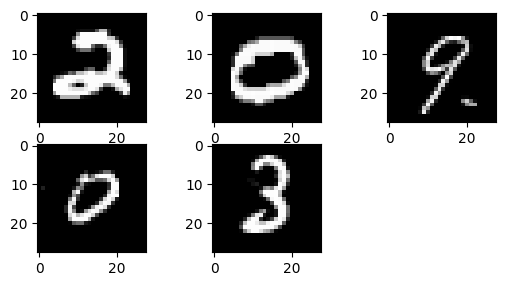

In [118]:
#Compare test data set with probabilities returned
X_test_show = X_test.values.reshape(-1,28,28,1)

for i in range(0, 5):
    plt.subplot(330 + (i+1))
    plt.imshow(X_test_show[i], cmap=plt.get_cmap('gray'))

In [119]:
# Assuming row_indices and results['label'] are already defined
df = pd.DataFrame({
    'ImageId': results['row_index'],
    'label': results['label']
})


# Save to CSV
df.to_csv('submission.csv', index=False)